In [1]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
import os
import cv2 # type: ignore
import tensorflow as tf# type: ignore
from sklearn.model_selection import train_test_split# type: ignore
from keras.preprocessing.image import ImageDataGenerator# type: ignore
from tensorflow import keras# type: ignore
from keras.models import Sequential# type: ignore
from keras.layers import Dense, Dropout, Flatten# type: ignore
from keras.layers import Conv2D, MaxPooling2D# type: ignore
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image


In [10]:
rust= os.listdir('C:/Users/mrina/Desktop/groundnut leaf classification and detection/Groundnut_Leaf_dataset/train/exp3/rust_1')
healthy_leaf = os.listdir('C:/Users/mrina/Desktop/groundnut leaf classification and detection/Groundnut_Leaf_dataset/train/exp3/healthy_leaf_1')

In [11]:
print('Number of images:', len(rust))
print('Number of images:', len(healthy_leaf))


Number of images: 1315
Number of images: 1462


In [12]:
rust_labels = [0]*1315
healthy_leaf_labels = [1]*1462

In [13]:
labels= rust_labels + healthy_leaf_labels

In [15]:
rust_path= 'C:/Users/mrina/Desktop/groundnut leaf classification and detection/Groundnut_Leaf_dataset/train/exp3/rust_1/'
data = []

for img_file in rust:

  image = Image.open(rust_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

healthy_leaf_path = 'C:/Users/mrina/Desktop/groundnut leaf classification and detection/Groundnut_Leaf_dataset/train/exp3/healthy_leaf_1/'
for img_file in healthy_leaf:

  image = Image.open(healthy_leaf_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)  

In [16]:
X = np.array(data)
Y = np.array(labels)

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=20)

In [18]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [19]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())


model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(2, activation='sigmoid'))

In [20]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [21]:
history = model.fit(X_train_scaled, Y_train, epochs=20)

Epoch 1/20


70/70 [==============================] - 7s 88ms/step - loss: 0.2071 - acc: 0.9045
Epoch 2/20
70/70 [==============================] - 6s 90ms/step - loss: 0.0438 - acc: 0.9820
Epoch 3/20
70/70 [==============================] - 6s 91ms/step - loss: 0.0369 - acc: 0.9865
Epoch 4/20
70/70 [==============================] - 6s 85ms/step - loss: 0.0270 - acc: 0.9883
Epoch 5/20
70/70 [==============================] - 6s 80ms/step - loss: 0.0185 - acc: 0.9946
Epoch 6/20
70/70 [==============================] - 7s 99ms/step - loss: 0.0163 - acc: 0.9937
Epoch 7/20
70/70 [==============================] - 7s 98ms/step - loss: 0.0147 - acc: 0.9959
Epoch 8/20
70/70 [==============================] - 7s 102ms/step - loss: 0.0148 - acc: 0.9959
Epoch 9/20
70/70 [==============================] - 7s 94ms/step - loss: 0.0417 - acc: 0.9847
Epoch 10/20
70/70 [==============================] - 6s 91ms/step - loss: 0.0344 - acc: 0.9883
Epoch 11/20
70/70 [==============================] - 7s 

In [22]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

18/18 [==============================] - 1s 33ms/step - loss: 6.6111e-04 - acc: 1.0000
Test Accuracy = 1.0


In [23]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

18/18 [==============================] - 1s 24ms/step


In [24]:
from sklearn import metrics


print(metrics.classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       273
           1       1.00      0.99      0.99       283

    accuracy                           0.99       556
   macro avg       0.99      0.99      0.99       556
weighted avg       0.99      0.99      0.99       556



[[263  10]
 [  1 282]]


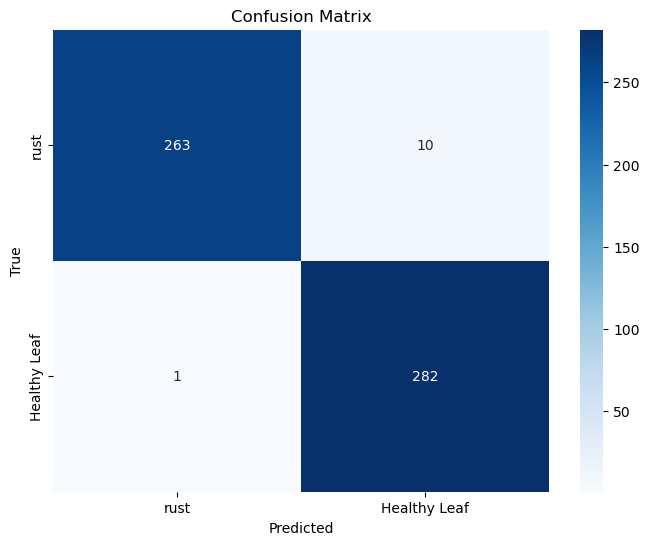

In [ ]:
from sklearn.metrics import confusion_matrix,roc_curve,auc
import seaborn as sns
conf_matrix = confusion_matrix(Y_test, y_pred)
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['rust', 'Healthy Leaf'], yticklabels=['rust', 'Healthy Leaf'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

18/18 [==============================] - 0s 14ms/step


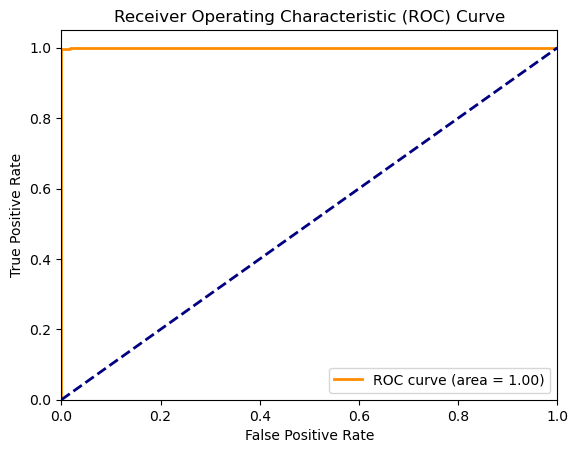

In [ ]:
y_pred_prob = model.predict(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(Y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [25]:
model.save('groundnut_leaf_classifier_model3.h5')

c:\Users\mrina\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from numpy import loadtxt
from tensorflow.keras.models import load_model
 
# load model
model = load_model('groundnut_leaf_classifier_model3.h5')

In [ ]:
model.summary()

In [ ]:
X = np.array(data)
Y = np.array(labels)

In [ ]:
score = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))